<a href="https://colab.research.google.com/github/rainardw/TUGAS-BESAR-BIG-DATA-CCTV-KOTA-MATARAM/blob/main/TUGAS_BESAR_CCTV_KOTA_MATARAM_WITH_COMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import string
from datetime import datetime, timedelta
import pandas as pd

In [13]:
def random_visual_string(min_len=50, max_len=200):
    length = random.randint(min_len, max_len)
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

In [14]:
locations = [
    "Karang Pule", "Gajah Mada", "Cakranegara", "Ampenan", "Majapahit", "Islamic Center NTB",
    "UNRAM Gate", "Kantor Walikota Mataram", "Sandubaya", "Panji Tilar", "Jalan Pemuda", "Swakarya", "Sriwijaya",
    "Lombok Epicentrum Mall", "Pagesangan", "Pejanggik",
    "Rembiga", "Sayang-Sayang", "Pagutan"
]

weather = ["Cerah", "Berawan", "Hujan Ringan", "Hujan Lebat", "Hujan Petir", "Kabut"]
directions = ["Utara → Selatan", "Selatan → Utara", "Timur → Barat", "Barat → Timur"]
vehicle_types = ["Motor", "Mobil", "Truk", "Bus"]

In [15]:
plate_prefixes = (
    ["DR"] * 50 +
    ["EA"] * 30 +
    ["B"] * 5 +
    ["AB"] * 5 +
    ["AD"] * 5 +
    ["N"] * 5
)

def generate_plate():
    prefix = random.choice(plate_prefixes)
    middle = str(random.randint(1000, 9999))
    suffix = "".join(random.choices(string.ascii_uppercase, k=2))
    return prefix + middle + suffix

def random_visual_string(size=120):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=size))

# Buat dataset
data = []
start_time = datetime(2025, 9, 18, 6, 0, 0)

for i in range(1000):
    timestamp = start_time + timedelta(seconds=i * random.randint(5, 15))

    vehicle_count = random.randint(50, 300)
    speed = random.uniform(15, 80)
    density = random.randint(100, 500)
    congestion_duration = random.randint(0, 60)
    visibility = random.randint(20, 150)
    motion_density = random.uniform(0.1, 1.0)
    brightness = random.randint(30, 100)

    vehicle_type = random.choice(vehicle_types)
    plate = generate_plate()

    data.append([
        i + 1, timestamp, random.choice(locations), vehicle_count, speed,
        density, congestion_duration, visibility, motion_density, brightness,
        random.choice(weather), random.choice(directions),
        vehicle_type, plate, random_visual_string()
    ])

df = pd.DataFrame(data, columns=[
    "id", "timestamp", "location", "vehicle_count", "speed",
    "density", "congestion_duration", "visibility", "motion_density",
    "brightness", "weather", "direction", "vehicle_type",
    "plate_number", "visual_data"
])

pd.set_option("display.max_rows", 1000)
df

,id,timestamp,location,vehicle_count,speed,density,congestion_duration,visibility,motion_density,brightness,weather,direction,vehicle_type,plate_number,visual_data
0,1,2025-09-18 06:00:00,UNRAM Gate,230,49.801793,186,38,41,0.708122,59,Berawan,Barat → Timur,Mobil,N8334PR,DZVYpon54uvn6MnQOVFZjaRpm9KdaBrd2kAE4AuxhA4TY9...
1,2,2025-09-18 06:00:05,Karang Pule,254,43.555613,192,50,114,0.239721,33,Cerah,Barat → Timur,Mobil,EA5115CW,ZR3E6YGELr0wdASJvB728HusO1nov42ijPyfQokynNyDT4...
2,3,2025-09-18 06:00:24,Pejanggik,164,56.130330,176,32,109,0.650725,97,Berawan,Selatan → Utara,Bus,DR4042WS,P7yeLifm6wGp2J38WSzv0xr3gMrD4RhnS9bYP9TvqIucF6...
3,4,2025-09-18 06:00:18,Swakarya,293,69.234447,407,25,71,0.909778,61,Hujan Lebat,Timur → Barat,Mobil,DR3231DA,wRaqMoCiz43niY5onLYKtCa0BuULyVh54Kb15YoRdaFeFG...
4,5,2025-09-18 06:00:24,Kantor Walikota Mataram,105,66.416455,447,43,125,0.320569,40,Berawan,Utara → Selatan,Bus,EA2932QI,rn3lcwf8UY89edA0t40dStJpHewYg0Ec4nvyztX2oR3rVv...
5,6,2025-09-18 06:00:45,Pejanggik,196,58.424118,140,57,32,0.781595,99,Hujan Ringan,Selatan → Utara,Truk,DR2299QT,vPV36upeuEljVLoQAcQ9p9iwbifefiW1uKb3SDK3S1P08S...
6,7,2025-09-18 06:00:30,Karang Pule,221,78.726726,309,1,72,0.350615,53,Cerah,Selatan → Utara,Truk,EA6021PS,zNl9XBmkuJ5LSHMqlCduaj7qR8F6VZERlvumUKvt1ILJ2X...
7,8,2025-09-18 06:01:38,Panji Tilar,287,53.674472,499,14,24,0.937535,34,Hujan Ringan,Selatan → Utara,Mobil,DR5409PY,vLRHLPZHQMSfar1ps6s13lvu7TmUNaAqdMOJuuBuK5TeVX...
8,9,2025-09-18 06:01:04,Sriwijaya,273,76.185239,166,35,76,0.766925,90,Kabut,Timur → Barat,Truk,EA9854EY,r6IvVyjkYvdpyqJMYMIInuOrLx6buBzUMhcnzjPCoZDaUC...
9,10,2025-09-18 06:01:39,Swakarya,68,62.747902,480,58,146,0.738789,82,Kabut,Selatan → Utara,Bus,DR3404FM,no7Y3NyM73VUuq9aeWZRnOc36R72jRjF3MvEsZB4ZY4zl2...


In [19]:
df.to_csv("dataset_cctv_mataram.csv", index=False)

In [20]:
df.describe()

,id,timestamp,vehicle_count,speed,density,congestion_duration,visibility,motion_density,brightness
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2025-09-18 07:23:34.467000064,176.777000,47.973573,298.282000,29.034000,85.991000,0.556152,65.789000
min,1.000000,2025-09-18 06:00:00,50.000000,15.097583,100.000000,0.000000,20.000000,0.100502,30.000000
25%,250.750000,2025-09-18 06:37:26,111.000000,33.337764,197.750000,14.000000,55.000000,0.338256,48.000000
50%,500.500000,2025-09-18 07:13:29.500000,178.000000,48.859608,296.000000,29.000000,87.000000,0.543343,66.000000
75%,750.250000,2025-09-18 08:03:55.500000,240.250000,62.747938,403.250000,45.000000,120.250000,0.785060,83.000000
max,1000.000000,2025-09-18 10:05:15,300.000000,79.987367,500.000000,60.000000,150.000000,0.999364,100.000000
std,288.819436,NaN,73.596357,17.954503,115.049497,17.719335,37.627101,0.257955,20.696348


In [22]:
df_encoded = df.copy()

# Create 'traffic_status' column based on 'speed' and 'density'
def get_traffic_status(row):
    speed = row['speed']
    density = row['density']
    if speed > 60 and density < 200:
        return 'Lancar' # Smooth
    elif 30 < speed <= 60 and 200 <= density < 400:
        return 'Normal' # Normal
    else:
        return 'Padat' # Congested

df_encoded['traffic_status'] = df_encoded.apply(get_traffic_status, axis=1)

label_cols = ["location", "weather", "direction", "vehicle_type", "plate_number", "visual_data", "traffic_status"]
encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le

In [33]:
X = df_encoded.drop(columns=["traffic_status", "timestamp"])
y = df_encoded["traffic_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("=== Decision Tree Classification Report ===")
print(classification_report(y_test, dt_pred))

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00       140

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [35]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_pred))

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       1.00      1.00      1.00        37
           2       0.99      1.00      1.00       140

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [36]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print("=== KNN Classification Report ===")
print(classification_report(y_test, knn_pred))

=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       0.60      0.13      0.21        23
           1       0.30      0.24      0.27        37
           2       0.74      0.87      0.80       140

    accuracy                           0.67       200
   macro avg       0.55      0.42      0.43       200
weighted avg       0.64      0.67      0.63       200



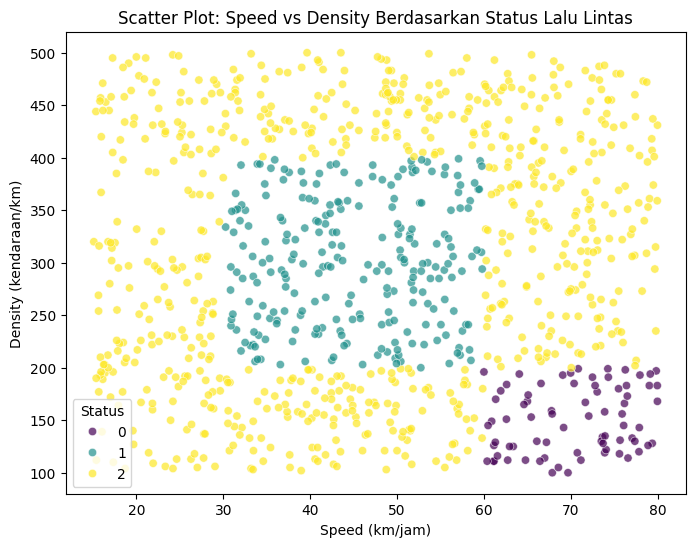

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_encoded,
    x="speed",
    y="density",
    hue="traffic_status",
    palette="viridis",
    alpha=0.7
)
plt.title("Scatter Plot: Speed vs Density Berdasarkan Status Lalu Lintas")
plt.xlabel("Speed (km/jam)")
plt.ylabel("Density (kendaraan/km)")
plt.legend(title="Status")
plt.show()

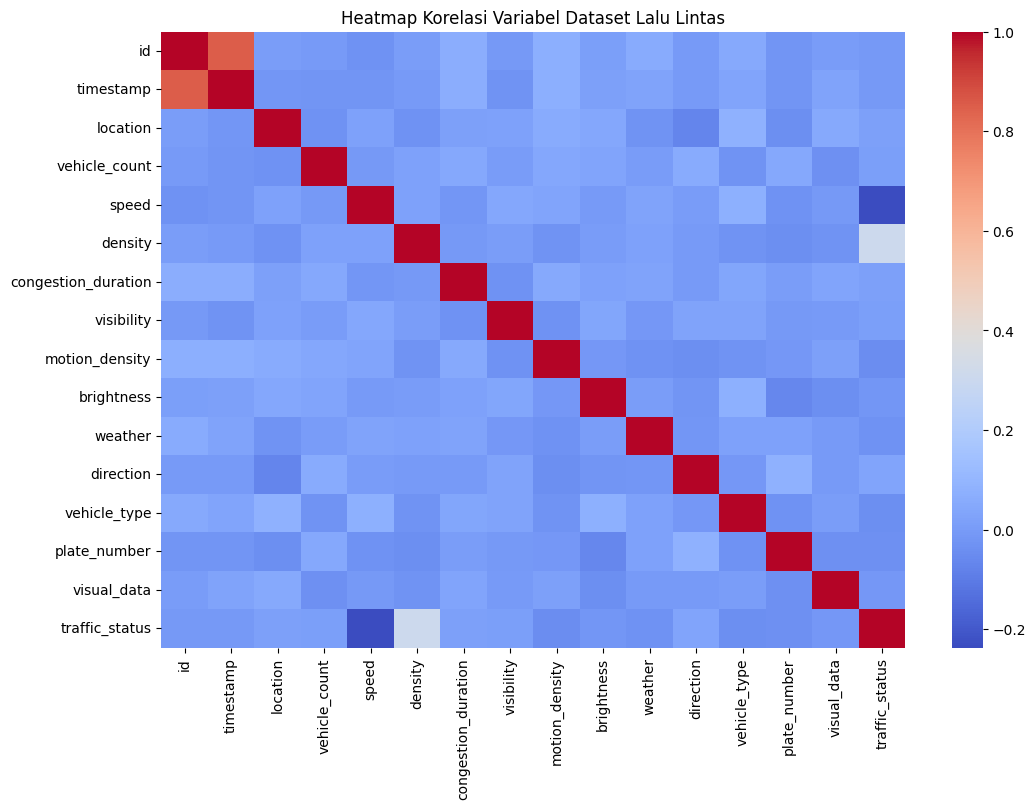

In [39]:
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Heatmap Korelasi Variabel Dataset Lalu Lintas")
plt.show()

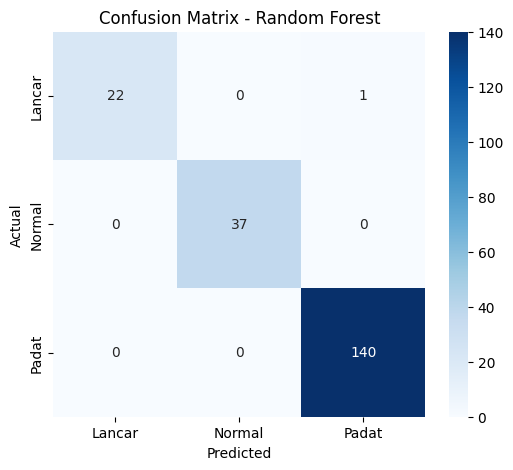

In [40]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoders["traffic_status"].classes_,
            yticklabels=encoders["traffic_status"].classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [41]:
from sklearn.metrics import accuracy_score

acc_dt = accuracy_score(y_test, dt_pred)
acc_rf = accuracy_score(y_test, rf_pred)
acc_knn = accuracy_score(y_test, knn_pred)

print("Akurasi Decision Tree :", acc_dt)
print("Akurasi Random Forest :", acc_rf)
print("Akurasi KNN :", acc_knn)

best_model = max([("Decision Tree", acc_dt),
                  ("Random Forest", acc_rf),
                  ("KNN", acc_knn)], key=lambda x: x[1])
print("\nModel terbaik adalah:", best_model[0], "dengan akurasi", best_model[1])

Akurasi Decision Tree : 1.0
Akurasi Random Forest : 0.995
Akurasi KNN : 0.67

Model terbaik adalah: Decision Tree dengan akurasi 1.0
